## Import Libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
X_train.shape #60,000 images of 28 x 28 dimension

(60000, 28, 28)

In [5]:
X_test.shape #10,000 images of 28 x 28 dimension

(10000, 28, 28)

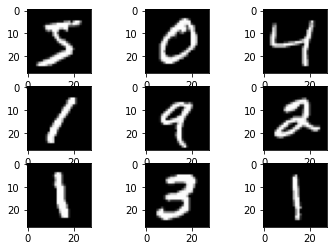

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalizing the dataset

In [8]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
tup = (28,28,1)
np.prod(tup)
print(X_train.shape[1:])

(28, 28, 1)


## Flatten the dataset

In [10]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test.shape

(10000, 784)

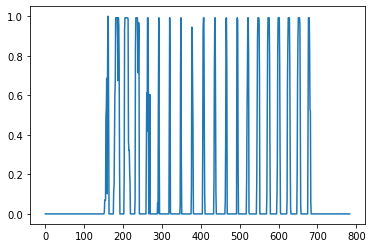

In [13]:
plt.plot(X_train[0])

# Vanilla Autoencoder Implementation

In [14]:
input_size = 784
hidden_size = 64
output_size = 784

In [15]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size, activation='relu')(x)
h2 = Dense(hidden_size, activation='relu')(h1)
r = Dense(output_size, activation='sigmoid')(h2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [16]:
h1

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

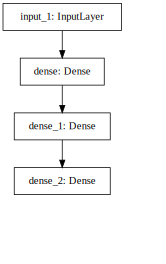

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [18]:
#pip install pydot

In [19]:
#pip install --upgrade pip

## Autoencoder Training

In [20]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 10s 4ms/step - loss: 0.0759 - val_loss: 0.0243
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0216 - val_loss: 0.0151
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0146 - val_loss: 0.0120
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0074 - val_loss: 0.006

## Plotting the Loss

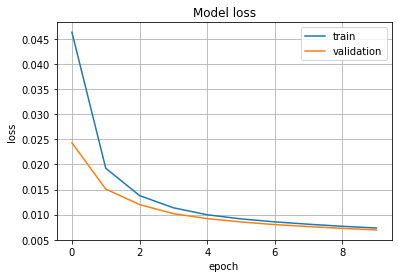

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation']) 
plt.grid()
plt.show()

## Tapping at the hidden layer

In [22]:
X_test.shape

(10000, 784)

In [23]:
conv_encoder = Model(x, h1)
encoded_images = conv_encoder.predict(X_test)

In [24]:
encoded_images.shape

(10000, 64)

In [25]:
#Latent Space representation
print(encoded_images[0])
enc = encoded_images[0].reshape(4, 16).T
print(enc)

[ 3.1958108   2.160782    3.005104    2.374777    2.4912326   2.6136801
  3.1603546   3.0701025   2.0653982  13.128932    2.205401    0.
  5.9523573   1.6349952   0.32307106  7.255212    5.032904    0.
  0.          7.2083626   4.07842     0.          4.284201    0.
  0.          4.881026    4.6823773   4.302812    3.6011605   3.9662385
  1.587885    0.28294188  1.7860223   4.441464    3.8138413   2.8404007
  0.          3.7368314   0.22281927  4.9017315   0.          6.5737224
  4.9229593   0.          0.          3.4059591   4.9480705   6.027246
  0.8330897   0.          1.30201     3.6819448   3.9563713   5.9668274
  5.726098    3.9487092   4.282267    0.          2.0340483   0.
  0.          4.130525    5.6975584   2.5513153 ]
[[ 3.1958108   5.032904    1.7860223   0.8330897 ]
 [ 2.160782    0.          4.441464    0.        ]
 [ 3.005104    0.          3.8138413   1.30201   ]
 [ 2.374777    7.2083626   2.8404007   3.6819448 ]
 [ 2.4912326   4.07842     0.          3.9563713 ]
 [ 2

## Plotting the Encoded Images

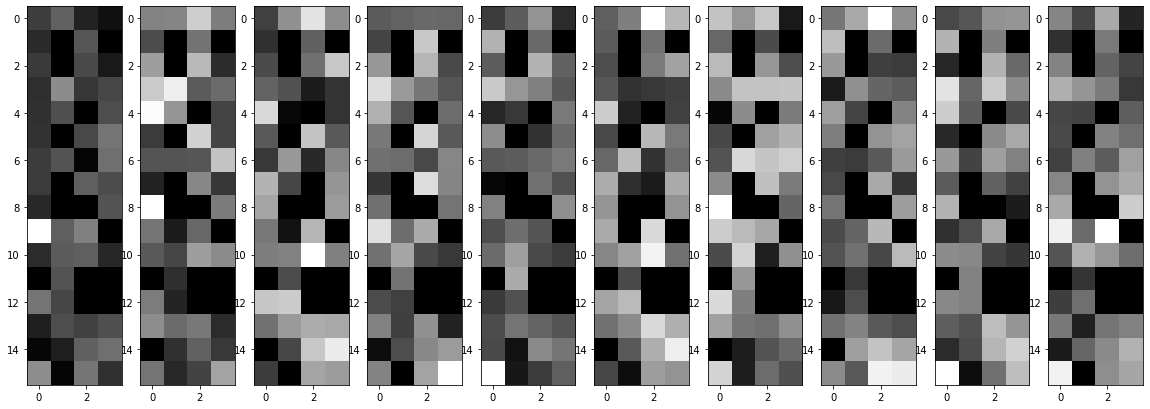

In [26]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_images[i].reshape(4, 16).T)
    plt.gray()
plt.show()

# Reconstructed Images

In [27]:
decoded_images = autoencoder.predict(X_test)

In [28]:
decoded_images.shape

(10000, 784)

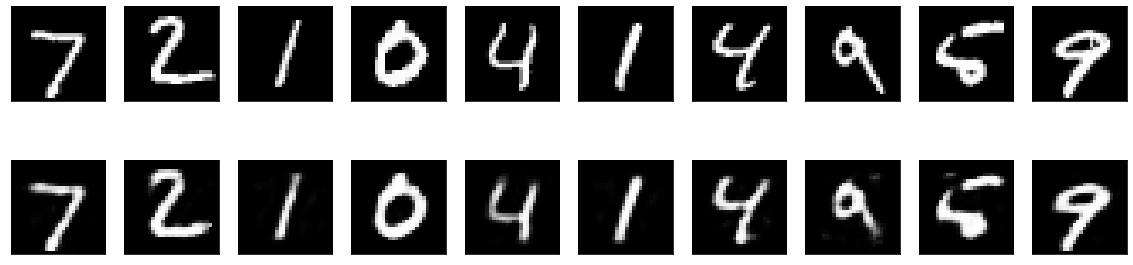

In [29]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


# Training Decoder Independently from the Latent Representation


In [30]:
encoded_train_img = conv_encoder.predict(X_train)

In [31]:
encoded_train_img.shape

(60000, 64)

In [32]:
encoded_test_img = conv_encoder.predict(X_test)

In [33]:
x = Input(shape=(hidden_size,))
h2 = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h2)

decoder = Model(inputs=x, outputs=r)
decoder.compile(optimizer='adam', loss='mse')

In [34]:
epochs = 10
batch_size = 128

history = decoder.fit(encoded_train_img, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(encoded_test_img, X_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0674 - val_loss: 0.0171
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0151 - val_loss: 0.0103
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0066

In [35]:
decoded_img = decoder.predict(encoded_test_img)

In [36]:
decoded_img.shape

(10000, 784)

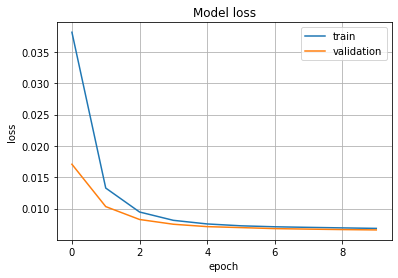

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation']) 
plt.grid()
plt.show()

In [38]:
print(X_test.shape)

(10000, 784)


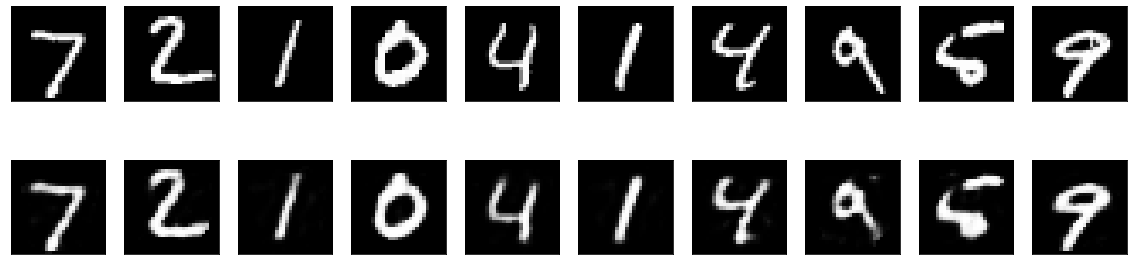

In [39]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


In [40]:
print(X_test.shape, decoded_img.shape)

(10000, 784) (10000, 784)


# Principal Component Analysis for Dimensionality Reduction

In [41]:
X_train.shape # 784 -> 28 x 28 dimensional data

(60000, 784)

In [42]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

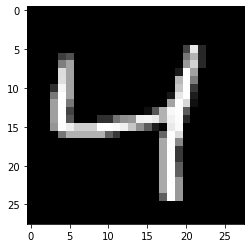

In [43]:
plt.imshow(X_train[2].reshape(28,28))
plt.show()

In [44]:
from sklearn.decomposition import PCA

## Determining the number of Components

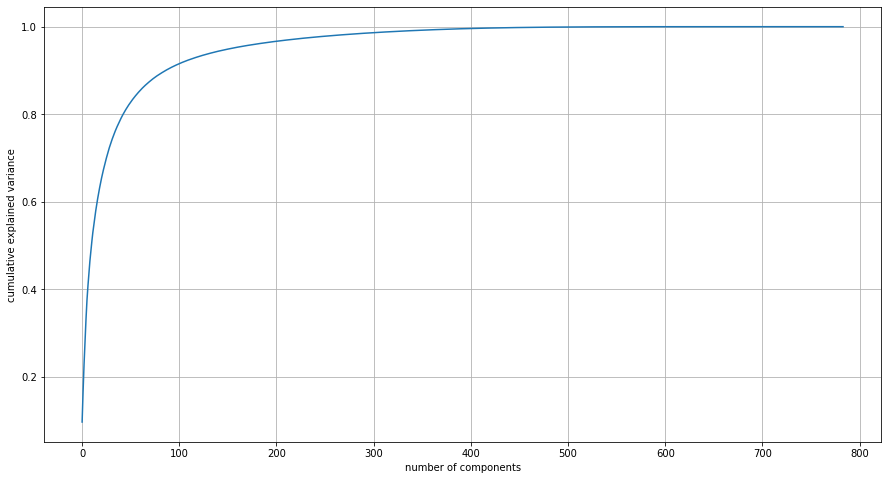

In [45]:
plt.figure(figsize=(15, 8))
pca1 = PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [46]:
pca = PCA(n_components=64) # components to keep 64 -> 8*8 dimensional data
pca.fit(X_train)

PCA(n_components=64)

In [47]:
print(pca.components_)
print(pca.components_.shape)

[[-2.3416507e-09  3.7021536e-10 -1.0300693e-09 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-8.6775955e-08  1.8072178e-09 -3.9774566e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-8.0216873e-09 -8.7472083e-09 -1.6673130e-08 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 3.6948677e-08 -1.2760303e-08  1.1571112e-08 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 4.8641620e-09  1.6474546e-08 -6.5935506e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 7.1707258e-09 -1.8476344e-08  7.3645463e-09 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
(64, 784)


In [48]:
print(pca.explained_variance_)
print(pca.explained_variance_.shape)

[5.116869   3.7413962  3.2527087  2.8416214  2.5671172  2.273663
 1.7251539  1.5205595  1.4563067  1.2427492  1.1120895  1.0666405
 0.90468043 0.8921815  0.83235335 0.7819003  0.69838685 0.6732553
 0.62599486 0.60776305 0.5621457  0.530799   0.5027804  0.48114705
 0.46578306 0.44253865 0.42843947 0.4146186  0.39266723 0.36426172
 0.34698626 0.34174207 0.31773457 0.30928108 0.30054918 0.28663284
 0.26668042 0.25722778 0.25383794 0.24900657 0.24082391 0.23454359
 0.22065745 0.20996198 0.20298001 0.19777106 0.19087204 0.18537919
 0.17929454 0.1696521  0.16818446 0.16491872 0.15605173 0.15232357
 0.14980444 0.1430759  0.1420869  0.13621697 0.1335992  0.12889986
 0.1266676  0.12589395 0.12109801 0.11659748]
(64,)


In [49]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape)

[0.09704707 0.07095971 0.06169121 0.05389449 0.04868821 0.04312253
 0.03271945 0.02883909 0.02762046 0.02357011 0.02109201 0.02023001
 0.01715826 0.01692121 0.0157865  0.0148296  0.01324568 0.01276903
 0.01187268 0.0115269  0.01066171 0.01006719 0.00953578 0.00912549
 0.00883409 0.00839323 0.00812583 0.0078637  0.00744737 0.00690863
 0.00658098 0.00648152 0.00602619 0.00586586 0.00570025 0.00543631
 0.00505789 0.00487861 0.00481432 0.00472268 0.00456749 0.00444838
 0.00418501 0.00398216 0.00384974 0.00375095 0.0036201  0.00351592
 0.00340052 0.00321764 0.0031898  0.00312787 0.00295969 0.00288898
 0.00284121 0.00271359 0.00269483 0.00258351 0.00253386 0.00244473
 0.00240239 0.00238772 0.00229676 0.0022114 ]
(64,)


In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09704707, 0.16800678, 0.22969799, 0.28359246, 0.33228067,
       0.3754032 , 0.40812266, 0.43696174, 0.4645822 , 0.48815233,
       0.5092443 , 0.5294743 , 0.5466326 , 0.5635538 , 0.57934034,
       0.5941699 , 0.6074156 , 0.62018466, 0.63205737, 0.64358425,
       0.654246  , 0.66431314, 0.6738489 , 0.6829744 , 0.69180846,
       0.7002017 , 0.70832753, 0.71619123, 0.7236386 , 0.7305472 ,
       0.73712814, 0.74360967, 0.7496359 , 0.75550175, 0.761202  ,
       0.7666383 , 0.77169615, 0.77657473, 0.78138906, 0.7861117 ,
       0.7906792 , 0.7951276 , 0.7993126 , 0.8032948 , 0.8071445 ,
       0.81089544, 0.81451553, 0.81803143, 0.82143193, 0.8246496 ,
       0.8278394 , 0.83096725, 0.8339269 , 0.8368159 , 0.8396571 ,
       0.84237075, 0.8450656 , 0.8476491 , 0.85018295, 0.8526277 ,
       0.85503006, 0.85741776, 0.8597145 , 0.8619259 ], dtype=float32)

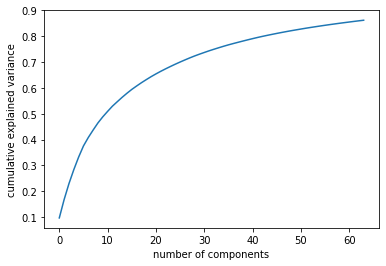

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [52]:
X_train_pca = pca.transform(X_train)

In [53]:
X_train_pca[0]

array([ 0.4859662 , -1.2261777 , -0.09616071, -2.1793964 , -0.1071156 ,
       -0.9116834 ,  0.917589  ,  0.6266889 , -1.4255692 ,  0.77813995,
        0.774503  , -0.9962987 , -0.44508946,  2.9384265 ,  0.8598475 ,
       -0.01840626,  1.2947176 ,  1.2123833 ,  1.0885938 ,  0.6522993 ,
        0.10800517, -0.252365  , -0.8516811 ,  0.9813503 ,  0.18103802,
        0.39347363, -1.2078617 ,  0.66709447, -0.49221224, -0.48392922,
       -0.38413644,  0.13559005,  0.42151135,  0.33176804, -0.597646  ,
        0.78744936,  0.25584808,  0.7851604 ,  0.6183254 , -1.4107032 ,
        0.7279433 ,  0.6056297 , -0.15731086, -0.3334145 , -0.4853632 ,
        0.02762286,  0.5000572 , -0.29935253,  0.1337391 ,  0.06899725,
        0.5131637 , -0.42631352, -0.46175936,  0.3494964 ,  0.01333746,
       -0.64050347, -0.4611097 ,  0.23415726, -0.6160029 , -0.5419842 ,
        0.23664851,  0.05609939, -0.26985186,  0.26602143], dtype=float32)

In [54]:
X_test_pca = pca.transform(X_test)

In [55]:
print("original shape:   ", X_train.shape) #original dimensions of 784
print("transformed shape:", X_train_pca.shape) #reduced dimension to 64

original shape:    (60000, 784)
transformed shape: (60000, 64)


In [56]:
#apply inverse_transform to get the original dimesion data
X_train_recon = pca.inverse_transform(X_train_pca)

In [57]:
print(X_train_recon.shape)

(60000, 784)


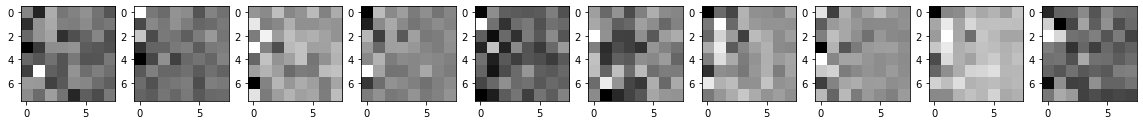

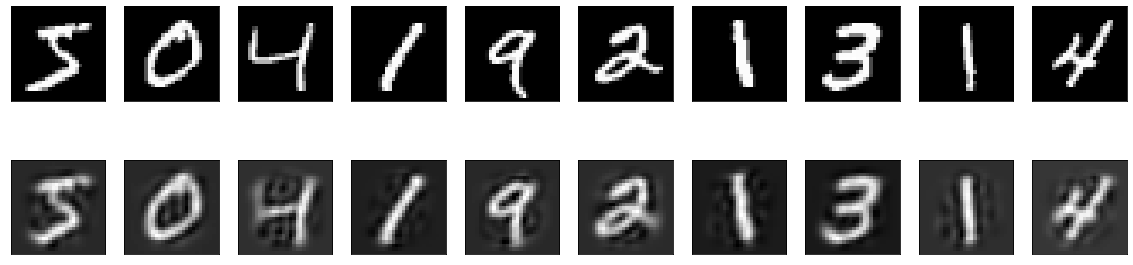

In [58]:
#Plotting the PCA reduced data
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train_pca[i].reshape(8, 8).T)
    plt.gray()
plt.show()


#Plotting actual and reconstructed data
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(X_train_recon[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Decoder trained from the Enocoder Output (Encoder trained on Autoencoder)

In [59]:
decoder.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f3075c8afd0>>

In [60]:
decoder_for_pca = decoder.predict(X_train_pca)

In [61]:
decoder_for_pca.shape

(60000, 784)

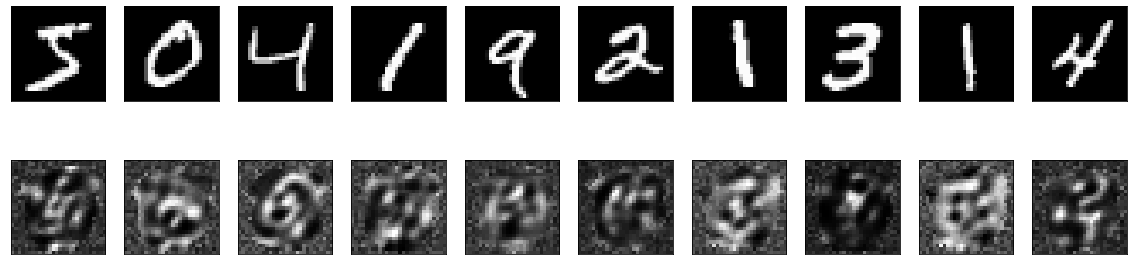

In [62]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoder_for_pca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


## Comparing Encoder Images and PCA reduced Images

In [63]:
print(encoded_train_img.shape, X_train_pca.shape)

(60000, 64) (60000, 64)


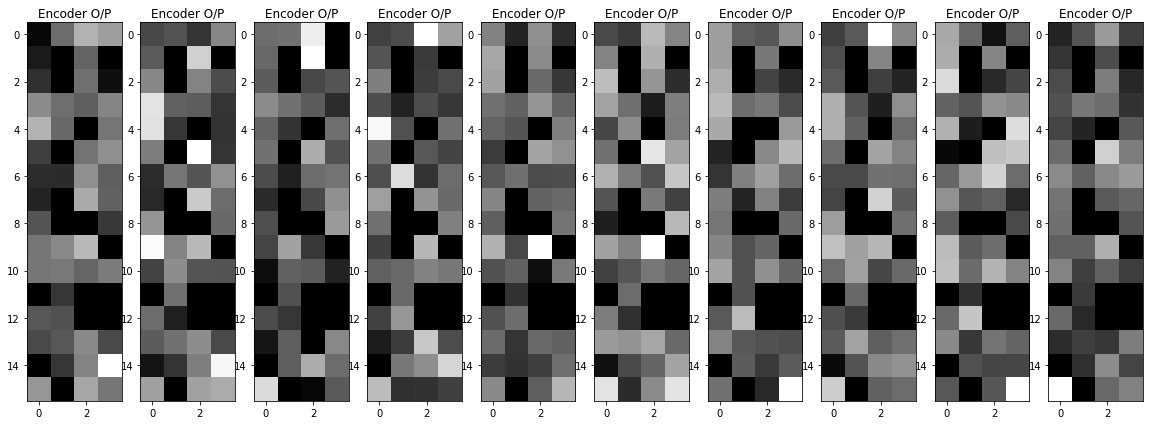

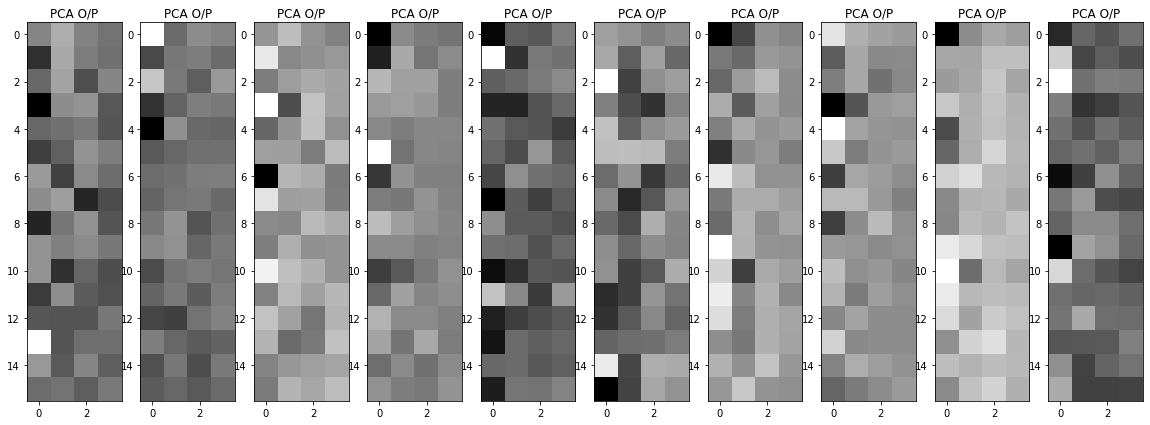

In [87]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('Encoder O/P')
    plt.imshow(encoded_train_img[i].reshape(4, 16).T)
    plt.gray()
plt.show()

plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('PCA O/P')
    plt.imshow(X_train_pca[i].reshape(4, 16).T)
    plt.gray()
plt.show()

## Reconstructing the PCA reduced data using Autoencoder trained Decoder

*two different nodes running diff algos:
    1. running pca and generates 64 as op
    2. purely training encoder and decoder with 64 as encoded op*


We want to :
1. Generate the compressed data using PCA
2. Then feed this data to a decoder which is a part of autoencoder. 

and check how good the reconstructed data is...

In [65]:
# PCA compressed data
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 64)
(10000, 64)


In [66]:
#Complete MNIST dataset 
dataset_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [67]:
print(dataset_pca.shape)

(70000, 64)


In [68]:
# Tapping at the hidden layer of size 64
#conv_decoder = Model(h2, r)
#decoded_images = conv_decoder.predict(dataset_pca)

In [69]:
decoder_input = Input(shape=(hidden_size,))

In [70]:
print(decoder_input)

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [71]:
print(autoencoder.layers[-1](decoder_input))

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")


In [72]:
# Tapping at the hidden layer of size 64
aebased_decoder = Model(decoder_input, autoencoder.layers[-1](decoder_input))

In [73]:
aebased_decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [74]:
aedecoder_pca = aebased_decoder.predict(X_train_pca)

In [75]:
aedecoder_pca.shape

(60000, 784)

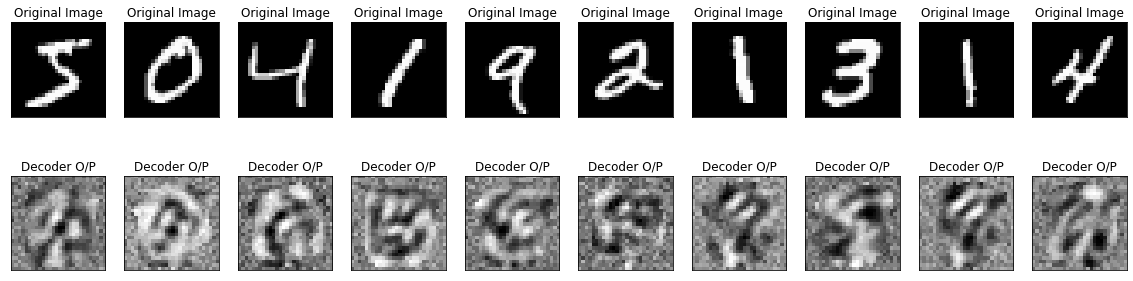

In [80]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.title('Original Image')
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction for extracted decoder(AE)
    ax = plt.subplot(3, n, i+n+1)
    plt.title('Decoder O/P')
    plt.imshow(aedecoder_pca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction for decoder trained on Encoder(AE) output
    #ax = plt.subplot(3, n, i+2*n+1)
    #plt.imshow(decoder_for_pca[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    
plt.show()


In [83]:
aedecoder_pca_test = aebased_decoder.predict(X_test_pca)

In [84]:
aedecoder_pca_test.shape

(10000, 784)

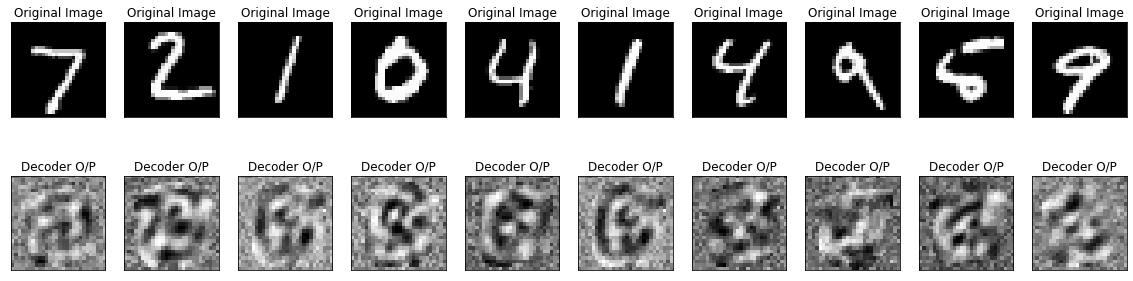

In [86]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.title('Original Image')
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction for extracted decoder(AE)
    ax = plt.subplot(3, n, i+n+1)
    plt.title('Decoder O/P')
    plt.imshow(aedecoder_pca_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction for decoder trained on Encoder(AE) output
    #ax = plt.subplot(3, n, i+2*n+1)
    #plt.imshow(decoder_for_pca[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    
plt.show()